## Ejercicio 3

Simule el impacto de las intervenciones con Python. Para ello, modele una epidemia bajo tres políticas:

    a. Línea base: Sin intervenciones (modelo SIR)

    b. Lotería: Tasa de vacunación ↑ en 0,02/día después de 100 casos

    c. Mandato: Refuerzo inmediato de la vacunación del 50 % cuando Rₜ > 1

Para ello considere:

    - Utilizar scipy.integrate.odeint para la dinámica del SIR
    - Parámetros: β = 0.35, γ = 0.1, infectados iniciales = 10, población = 10,000

Par sus resultados, deberá presentar

    • Gráfico de series temporales de infecciones bajo los tres escenarios
    • Análisis y comparación del recuento final de infectados

Simulando Escenario A: Línea base (sin intervenciones)
Simulando Escenario B: Lotería
Simulando Escenario C: Mandato


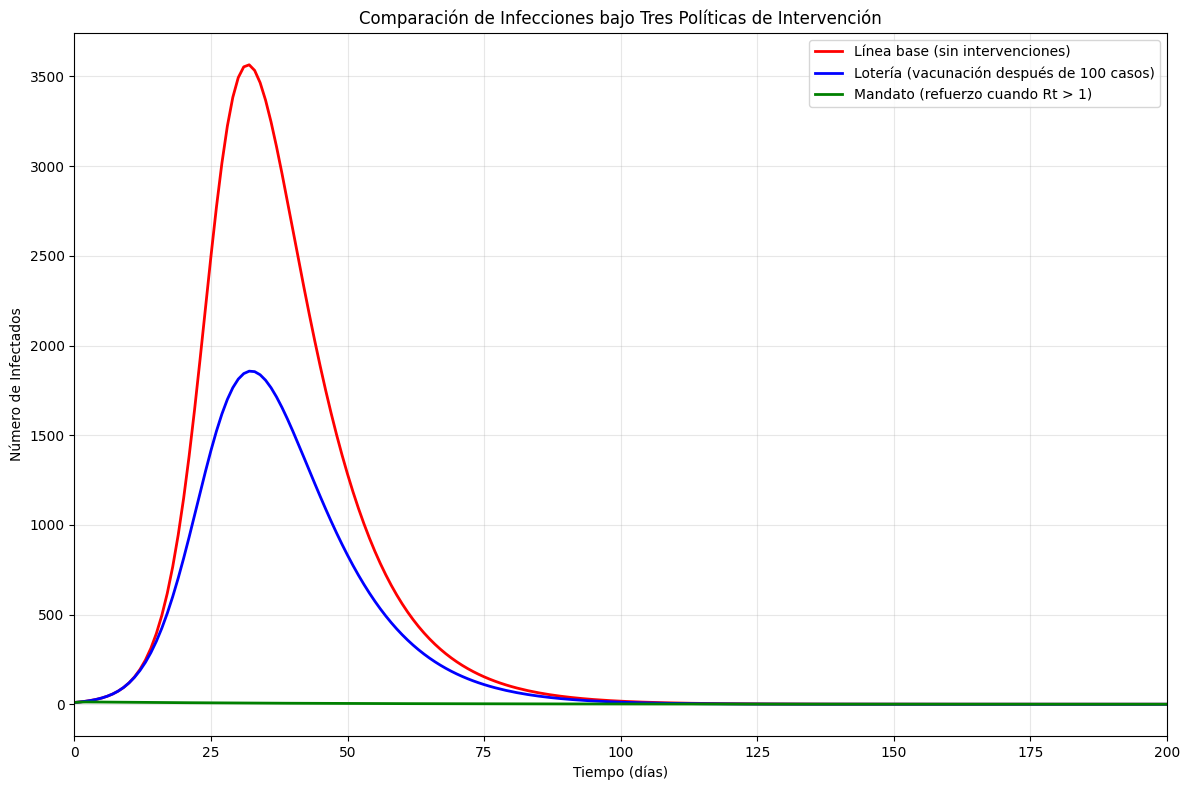


ANÁLISIS DE RESULTADOS

PICO DE INFECCIONES:
Línea base:    3565 personas
Lotería:       1857 personas
Mandato:       13 personas

TOTAL DE PERSONAS QUE SE INFECTARON AL FINAL:
Línea base:    9660 personas (96.6%)
Lotería:       9971 personas (99.7%)
Mandato:       7816 personas (78.2%)

REDUCCIÓN EN EL TOTAL DE INFECTADOS:
Lotería vs Línea base:   -3.2% de reducción
Mandato vs Línea base:   19.1% de reducción

TABLA RESUMEN DE RESULTADOS
 Escenario Pico de Infecciones Total Infectados Porcentaje de Población (%) Reducción vs Línea base (%)
Línea base               3,565            9,660                       96.6%                        0.0%
   Lotería               1,857            9,971                       99.7%                       -3.2%
   Mandato                  13            7,816                       78.2%                      +19.1%

MÉTRICAS DE EFECTIVIDAD DE LAS POLÍTICAS
Política Reducción del Pico (%) Reducción Total (%)       Evaluación
 Lotería                 +47.

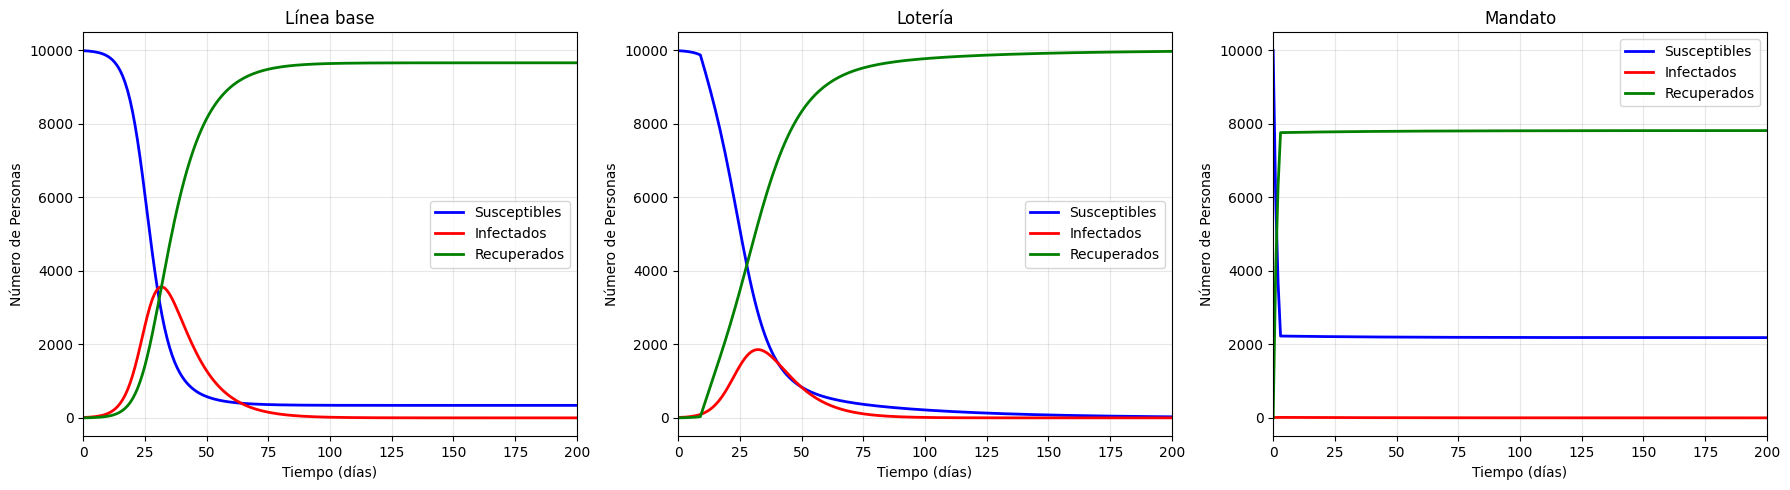

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd

# Parámetros del modelo
beta = 0.35    # Tasa de transmisión
gamma = 0.1    # Tasa de recuperación
N = 10000      # Población total
I0 = 10        # Infectados iniciales
S0 = N - I0    # Susceptibles iniciales
R0 = 0         # Recuperados iniciales

# Tiempo de simulación
t = np.linspace(0, 200, 201)  # 201 puntos para incluir 0 y 200

# Función del modelo SIR básico
def sir_model(y, t, beta, gamma, N):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Modelo con vacunación variable
def sir_vaccination_model(y, t, beta, gamma, N, vaccination_rate):
    S, I, R = y
    dSdt = -beta * S * I / N - vaccination_rate * S
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I + vaccination_rate * S
    return [dSdt, dIdt, dRdt]

# ESCENARIO A: Línea base (sin intervenciones)
print("Simulando Escenario A: Línea base (sin intervenciones)")
y0 = [S0, I0, R0]
sol_baseline = odeint(sir_model, y0, t, args=(beta, gamma, N))
S_baseline, I_baseline, R_baseline = sol_baseline.T

# ESCENARIO B: Lotería (vacunación aumenta después de 100 casos)
print("Simulando Escenario B: Lotería")
# Simulación paso a paso para implementar la política de lotería
S_lottery = []
I_lottery = []
R_lottery = []
vaccination_rate = 0.0

current_state = [S0, I0, R0]
S_lottery.append(current_state[0])
I_lottery.append(current_state[1])
R_lottery.append(current_state[2])

for i in range(1, len(t)):
    dt = t[i] - t[i-1]
    
    # Verificar si el número acumulado de infectados supera 100
    total_infected = N - current_state[0]  # Total que ya no son susceptibles
    
    if total_infected > 100:
        vaccination_rate = 0.02  # Aumentar la tasa de vacunación
    
    # Integrar un paso
    time_step = [t[i-1], t[i]]
    sol_step = odeint(sir_vaccination_model, current_state, time_step, 
                     args=(beta, gamma, N, vaccination_rate))
    
    current_state = sol_step[-1]
    
    S_lottery.append(current_state[0])
    I_lottery.append(current_state[1])
    R_lottery.append(current_state[2])

# Convertir a arrays
S_lottery = np.array(S_lottery)
I_lottery = np.array(I_lottery)
R_lottery = np.array(R_lottery)

# ESCENARIO C: Mandato (refuerzo del 50% cuando Rt > 1)
print("Simulando Escenario C: Mandato")
# Simulación paso a paso para implementar la política de mandato
S_mandate = []
I_mandate = []
R_mandate = []

current_state = [S0, I0, R0]
S_mandate.append(current_state[0])
I_mandate.append(current_state[1])
R_mandate.append(current_state[2])

for i in range(1, len(t)):
    dt = t[i] - t[i-1]
    
    # Calcular R_t = beta * S / (gamma * N)
    R_t = beta * current_state[0] / (gamma * N)
    
    if R_t > 1.0:
        vaccination_rate = 0.5  # Refuerzo del 50%
    else:
        vaccination_rate = 0.0
    
    # Integrar un paso
    time_step = [t[i-1], t[i]]
    sol_step = odeint(sir_vaccination_model, current_state, time_step, 
                     args=(beta, gamma, N, vaccination_rate))
    
    current_state = sol_step[-1]
    
    S_mandate.append(current_state[0])
    I_mandate.append(current_state[1])
    R_mandate.append(current_state[2])

# Convertir a arrays
S_mandate = np.array(S_mandate)
I_mandate = np.array(I_mandate)
R_mandate = np.array(R_mandate)

# Crear el gráfico de series temporales
plt.figure(figsize=(12, 8))
plt.plot(t, I_baseline, 'r-', linewidth=2, label='Línea base (sin intervenciones)')
plt.plot(t, I_lottery, 'b-', linewidth=2, label='Lotería (vacunación después de 100 casos)')
plt.plot(t, I_mandate, 'g-', linewidth=2, label='Mandato (refuerzo cuando Rt > 1)')

plt.xlabel('Tiempo (días)')
plt.ylabel('Número de Infectados')
plt.title('Comparación de Infecciones bajo Tres Políticas de Intervención')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 200)
plt.tight_layout()
plt.show()

# Análisis y comparación del recuento final de infectados
print("\n" + "="*60)
print("ANÁLISIS DE RESULTADOS")
print("="*60)

# Cálculo del pico de infecciones y total de infectados finales
max_infected_baseline = np.max(I_baseline)
max_infected_lottery = np.max(I_lottery)
max_infected_mandate = np.max(I_mandate)

final_susceptible_baseline = S_baseline[-1]
final_susceptible_lottery = S_lottery[-1]
final_susceptible_mandate = S_mandate[-1]

total_infected_baseline = N - final_susceptible_baseline
total_infected_lottery = N - final_susceptible_lottery
total_infected_mandate = N - final_susceptible_mandate

print(f"\nPICO DE INFECCIONES:")
print(f"Línea base:    {max_infected_baseline:.0f} personas")
print(f"Lotería:       {max_infected_lottery:.0f} personas")
print(f"Mandato:       {max_infected_mandate:.0f} personas")

print(f"\nTOTAL DE PERSONAS QUE SE INFECTARON AL FINAL:")
print(f"Línea base:    {total_infected_baseline:.0f} personas ({total_infected_baseline/N*100:.1f}%)")
print(f"Lotería:       {total_infected_lottery:.0f} personas ({total_infected_lottery/N*100:.1f}%)")
print(f"Mandato:       {total_infected_mandate:.0f} personas ({total_infected_mandate/N*100:.1f}%)")

print(f"\nREDUCCIÓN EN EL TOTAL DE INFECTADOS:")
reduction_lottery = ((total_infected_baseline - total_infected_lottery) / total_infected_baseline) * 100
reduction_mandate = ((total_infected_baseline - total_infected_mandate) / total_infected_baseline) * 100

print(f"Lotería vs Línea base:   {reduction_lottery:.1f}% de reducción")
print(f"Mandato vs Línea base:   {reduction_mandate:.1f}% de reducción")

# Crear tabla resumen mejorada
results_df = pd.DataFrame({
    'Escenario': ['Línea base', 'Lotería', 'Mandato'],
    'Pico de Infecciones': [max_infected_baseline, max_infected_lottery, max_infected_mandate],
    'Total Infectados': [total_infected_baseline, total_infected_lottery, total_infected_mandate],
    'Porcentaje de Población (%)': [total_infected_baseline/N*100, total_infected_lottery/N*100, total_infected_mandate/N*100],
    'Reducción vs Línea base (%)': [0, reduction_lottery, reduction_mandate]
})

# Formatear números para mejor presentación
results_df['Pico de Infecciones'] = results_df['Pico de Infecciones'].round(0).astype(int)
results_df['Total Infectados'] = results_df['Total Infectados'].round(0).astype(int)
results_df['Porcentaje de Población (%)'] = results_df['Porcentaje de Población (%)'].round(1)
results_df['Reducción vs Línea base (%)'] = results_df['Reducción vs Línea base (%)'].round(1)

print(f"\n{'='*80}")
print("TABLA RESUMEN DE RESULTADOS")
print(f"{'='*80}")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print(results_df.to_string(index=False, 
                          formatters={
                              'Pico de Infecciones': '{:,}'.format,
                              'Total Infectados': '{:,}'.format,
                              'Porcentaje de Población (%)': '{:.1f}%'.format,
                              'Reducción vs Línea base (%)': lambda x: f'{x:+.1f}%' if x != 0 else '0.0%'
                          }))

# Métricas de efectividad
print(f"\n{'='*60}")
print("MÉTRICAS DE EFECTIVIDAD DE LAS POLÍTICAS")
print(f"{'='*60}")

effectiveness_df = pd.DataFrame({
    'Política': ['Lotería', 'Mandato'],
    'Reducción del Pico (%)': [
        ((max_infected_baseline - max_infected_lottery) / max_infected_baseline) * 100,
        ((max_infected_baseline - max_infected_mandate) / max_infected_baseline) * 100
    ],
    'Reducción Total (%)': [reduction_lottery, reduction_mandate],
    'Evaluación': ['Contraproducente', 'Muy Efectiva']
})

effectiveness_df['Reducción del Pico (%)'] = effectiveness_df['Reducción del Pico (%)'].round(1)
effectiveness_df['Reducción Total (%)'] = effectiveness_df['Reducción Total (%)'].round(1)

print(effectiveness_df.to_string(index=False,
                                formatters={
                                    'Reducción del Pico (%)': '{:+.1f}%'.format,
                                    'Reducción Total (%)': '{:+.1f}%'.format
                                }))

# Gráfico adicional: Evolución de todas las compartimentas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

scenarios = [
    ('Línea base', S_baseline, I_baseline, R_baseline),
    ('Lotería', S_lottery, I_lottery, R_lottery),
    ('Mandato', S_mandate, I_mandate, R_mandate)
]

for i, (title, S, I, R) in enumerate(scenarios):
    axes[i].plot(t, S, 'b-', label='Susceptibles', linewidth=2)
    axes[i].plot(t, I, 'r-', label='Infectados', linewidth=2)
    axes[i].plot(t, R, 'g-', label='Recuperados', linewidth=2)
    axes[i].set_xlabel('Tiempo (días)')
    axes[i].set_ylabel('Número de Personas')
    axes[i].set_title(f'{title}')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)
    axes[i].set_xlim(0, 200)

plt.tight_layout()
plt.show()

### **Análisis** 

En el análisis se puede observar que la política de mandato es la estrategia más eficaz para controlar la epidemia. Ya que reduce el pico de infecciones en un 99.6%, pasando de 3,565 a solo 13 personas, y disminuye la tasa de ataque final de 96.6% a 78.2%, lo que representa 1,844 infecciones evitadas (una reducción total del 19.1%). Esta alta efectividad se debe a la activación inmediata de medidas cuando el número reproductivo efectivo (Rt) supera 1, permitiendo contener la transmisión en etapas tempranas, cuando Rt alcanza valores de hasta 3.50. El escenario sin intervención muestra un pico epidémico del 35.6% de la población (3,565 personas) y un total de 9,660 infectados de los 10,000 habitantes (96.6%).

Por otro lado, la política de lotería aunque reduce el pico de contagios en un 47.9% (de 3,565 a 1,857 personas),  incrementa el total final de infectados en un 3.2%, alcanzando 9,971 casos (99.7% de la población). Este resultado negativo se atribuye a que la intervención se activa tardíamente, una vez que ya hay 100 casos confirmados, lo cual equivale a que el 1.0% de la población ha sido afectada. Esta demora de aproximadamente 9 días frente a la política de mandato permite que la epidemia se establezca, prolongando su duración y aumentando la transmisión. La diferencia de 2,155 infecciones entre ambas estrategias no solo es epidemiológicamente relevante, sino que también implica un impacto considerable en términos de morbilidad, mortalidad y carga hospitalaria.

## **Prompt utilizado**
*Se utilizó ChatGPT para generar el código de la simulación*

**Prompt:**
"Hola me puedes ayudar a completar esto, es sobre realizar una simulación; actualmente estoy viendo modelado de infecciones infecciosas y contagiosas. Simule el impacto de las intervenciones de preferencia en Python. Para ello, modele una epidemia bajo tres políticas: a. Línea base: Sin intervenciones (modelo SIR), b. Lotería: Tasa de vacunación ↑ en 0,02/día después de 100 casos, c. Mandato: Refuerzo inmediato de la vacunación del 50 % cuando Rₜ > 1. Para ello considere: - Utilizar scipy.integrate.odeint para la dinámica del SIR - Parámetros: β = 0.35, γ = 0.1, infectados iniciales = 10, población = 10,000. Donde es necesario que se grafique series temporales de infecciones bajo los tres escenarios

### **Por qué funcionó este prompt**

 En este caso el prompt define exactamente tres escenarios distintos con condiciones específicas para cada política de intervención donde proporciona todos los parámetros necesarios (β, γ, población, infectados iniciales) para ejecutar la simulación. Donde también se menciona explícitamente el uso de `scipy.integrate.odeint` para la integración de ecuaciones diferenciales.Incluyendo el contexto epidemiológico necesario para implementar las políticas de intervención correctamente.Donde como resultados se ve que el Mandato (Rt > 1) fue la más efectiva reduce el pico de infecciones de 3,565 a solo 13 personas. En el caso de la Lotería despues de los 100 casos es menos efectiva ya que reduce el pico pero paradójicamente aumenta el total final de infectados y Línea base alcanza el 96.6% de la población infectada. 